## Step 1. Wrangle the Zillow data set

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env


import wrangle

In [2]:
df = wrangle.get_zillow_data()
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,10759547,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,11193347,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,11215747,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,11229347,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,11324547,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
df.size

17222912

In [4]:
df.shape

(2152864, 8)

### 2.153 mn rows of data

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,2152864.0,1.309657e+07,5.171556e+06,10711725.00,1.165907e+07,1.259851e+07,1.405609e+07,1.696019e+08
bedroomcnt,2152853.0,3.287195e+00,9.547568e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,2.500000e+01
bathroomcnt,2152853.0,2.230687e+00,9.992805e-01,0.00,2.000000e+00,2.000000e+00,3.000000e+00,3.200000e+01
calculatedfinishedsquarefeet,2144379.0,1.862855e+03,1.222125e+03,1.00,1.257000e+03,1.623000e+03,2.208000e+03,9.525760e+05
taxvaluedollarcnt,2152371.0,4.618961e+05,6.996759e+05,1.00,1.881700e+05,3.276710e+05,5.345270e+05,9.842891e+07
yearbuilt,2143526.0,1.960950e+03,2.216220e+01,1801.00,1.949000e+03,1.958000e+03,1.976000e+03,2.016000e+03
taxamount,2148422.0,5.634864e+03,8.178909e+03,1.85,2.534972e+03,4.108945e+03,6.414318e+03,1.337756e+06
fips,2152864.0,6.048377e+03,2.043329e+01,6037.00,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
dtypes: float64(7), int64(1)
memory usage: 131.4 MB


### I need to convert bedroom, bathroom, sq ft and year built into int type later 

In [7]:
df.info(show_counts = True) #shows non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 8 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      2152864 non-null  int64  
 1   bedroomcnt                    2152853 non-null  float64
 2   bathroomcnt                   2152853 non-null  float64
 3   calculatedfinishedsquarefeet  2144379 non-null  float64
 4   taxvaluedollarcnt             2152371 non-null  float64
 5   yearbuilt                     2143526 non-null  float64
 6   taxamount                     2148422 non-null  float64
 7   fips                          2152864 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 131.4 MB


## How much of the data is null? About 1.1%, across all categories. I'm comfortable dropping that in the interest of time, considering the size of the remaining data.

In [8]:
null_sum = pd.Series(df.isnull().sum()) #shows null counts
null_sum

parcelid                           0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8485
taxvaluedollarcnt                493
yearbuilt                       9338
taxamount                       4442
fips                               0
dtype: int64

In [9]:
null_sum.sum()

22780

In [10]:
(null_sum.sum()/len(df))

0.010581253623080697

In [11]:
# remove empty entries stored as whitespace, convert to nulls
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,10759547,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,11193347,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,11215747,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,11229347,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,11324547,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [12]:
## verify whitespace has been converted to null
df.isna().sum()

parcelid                           0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8485
taxvaluedollarcnt                493
yearbuilt                       9338
taxamount                       4442
fips                               0
dtype: int64

In [13]:
# drop null rows
df = df.dropna()
df.shape

(2140235, 8)

In [14]:
# drop any duplicate rows
df = df.drop_duplicates(keep='first')
df.shape

(2140235, 8)

In [15]:
# convert column types
df = df.astype({'bedroomcnt': int, 'fips':int,
          'calculatedfinishedsquarefeet': int, 'yearbuilt': int})
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,11324547,4,2.0,3633,296425.0,2005,6941.39,6037
6,11544747,3,4.0,1620,847770.0,2011,10244.94,6037
7,11585547,3,2.0,2077,646760.0,1926,7924.68,6037
11,11954547,0,0.0,1200,5328.0,1972,91.60,6037
14,12537947,0,0.0,171,6920.0,1973,255.17,6037


In [16]:
# look at value counts for bed/bath

df_missing_info = df[(df.bedroomcnt == 0) | (df.bathroomcnt == 0) | (df.calculatedfinishedsquarefeet <= 70)]

In [17]:
df_missing_info.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,5346.0,1.355271e+07,9.103736e+06,10713128.00,1.152422e+07,12023713.50,1.298200e+07,1.676892e+08
bedroomcnt,5346.0,5.402170e-01,1.303651e+00,0.00,0.000000e+00,0.00,0.000000e+00,1.800000e+01
bathroomcnt,5346.0,3.221100e-01,1.089222e+00,0.00,0.000000e+00,0.00,0.000000e+00,2.000000e+01
calculatedfinishedsquarefeet,5346.0,1.464158e+03,7.606771e+03,1.00,3.780000e+02,722.00,1.565500e+03,5.311180e+05
taxvaluedollarcnt,5346.0,3.666633e+05,1.336631e+06,22.00,3.035875e+04,124368.50,3.223152e+05,3.336760e+07
yearbuilt,5346.0,1.953951e+03,2.709895e+01,1890.00,1.930000e+03,1953.00,1.978000e+03,2.016000e+03
taxamount,5346.0,4.453605e+03,1.568612e+04,6.34,5.066025e+02,1734.72,4.061953e+03,3.993695e+05
fips,5346.0,6.050426e+03,2.720347e+01,6037.00,6.037000e+03,6037.00,6.037000e+03,6.111000e+03


### For the df of missing values, let's see what they are commonly missing, and a distribution of price

<AxesSubplot:>

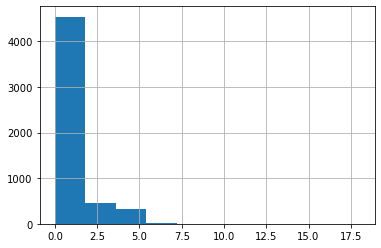

In [18]:
df_missing_info.bedroomcnt.hist()

<AxesSubplot:>

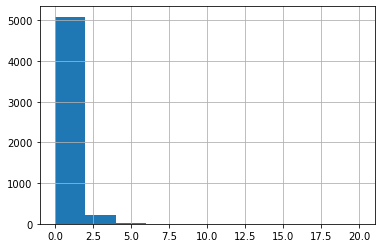

In [19]:
df_missing_info.bathroomcnt.hist()

<AxesSubplot:>

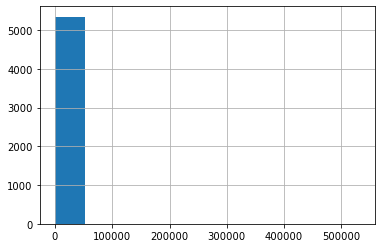

In [20]:
df_missing_info.calculatedfinishedsquarefeet.hist()

<AxesSubplot:>

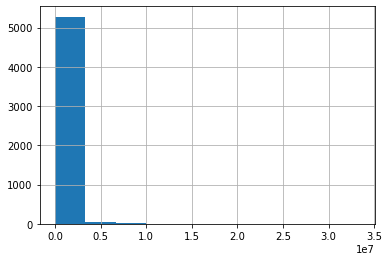

In [21]:
df_missing_info.taxvaluedollarcnt.hist()

In [22]:
df_missing_info.shape

(5346, 8)

In [23]:
# most homes in df_missing_info are missing a market value, as well as other key information such as bd/br/sq ft
# I feel comfortable dropping them from the final df
df = df[(df.bedroomcnt != 0) & (df.bathroomcnt != 0) & (df.calculatedfinishedsquarefeet >= 69)]
df.shape

(2134889, 8)

In [24]:
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,11324547,4,2.0,3633,296425.0,2005,6941.39,6037
6,11544747,3,4.0,1620,847770.0,2011,10244.94,6037
7,11585547,3,2.0,2077,646760.0,1926,7924.68,6037
18,12716947,3,1.0,1244,169471.0,1950,2532.88,6037
19,12757147,3,2.0,1300,233266.0,1950,3110.99,6037


## Takeways from Wrangling (acquire and prep) :
- We have dropped all null rows
- no duplicates in dataset
- dropped rows with 0 val for bd/br, and less than 70 for sqft
- we now have 2.134 mn rows remaining
    - removed 22,780 null rows
    - dropped 5,346 rows with '0' amount values in key fields 

## Step 2. Look at distributions in the dataset

In [25]:
df.columns

Index(['parcelid', 'bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134889 entries, 4 to 2152863
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bedroomcnt                    int64  
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  int64  
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     int64  
 6   taxamount                     float64
 7   fips                          int64  
dtypes: float64(3), int64(5)
memory usage: 146.6 MB


<Figure size 576x288 with 0 Axes>

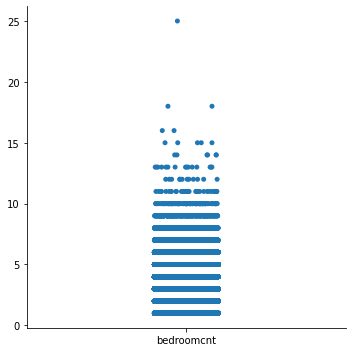

In [27]:
plt.figure(figsize=(8,4))
sns.catplot(data=df[['bedroomcnt']])

<Figure size 576x288 with 0 Axes>

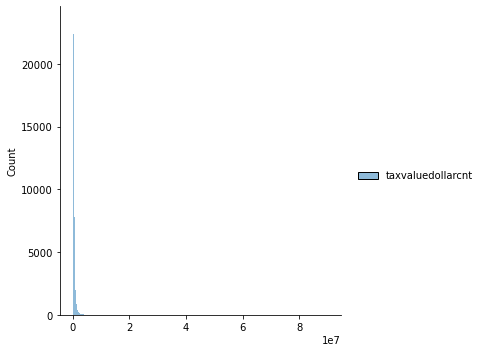

In [28]:
plt.figure(figsize=(8,4))
sns.displot(data=df[['taxvaluedollarcnt']])

In [29]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("_________________")

parcelid
11324547    1
11579580    1
11578844    1
11576049    1
11575630    1
           ..
12888934    1
12888719    1
12888619    1
12888596    1
12385768    1
Name: parcelid, Length: 2134889, dtype: int64
_________________
bedroomcnt
3     962633
4     633361
2     334071
5     150594
6      25104
1      22749
7       4791
8       1102
9        290
10       118
11        33
13        15
12        12
14         6
15         5
16         2
18         2
25         1
Name: bedroomcnt, dtype: int64
_________________
bathroomcnt
2.00     942322
3.00     422354
1.00     411772
2.50     142811
4.00      82028
1.50      31155
3.50      28460
5.00      28296
4.50      19469
6.00      10716
5.50       6200
7.00       4380
8.00       1680
6.50       1328
9.00        705
7.50        379
10.00       321
11.00       145
8.50        108
12.00        72
9.50         49
13.00        38
14.00        23
15.00        15
10.50        14
0.50         14
16.00         9
18.00         6
20.00         4
1.7

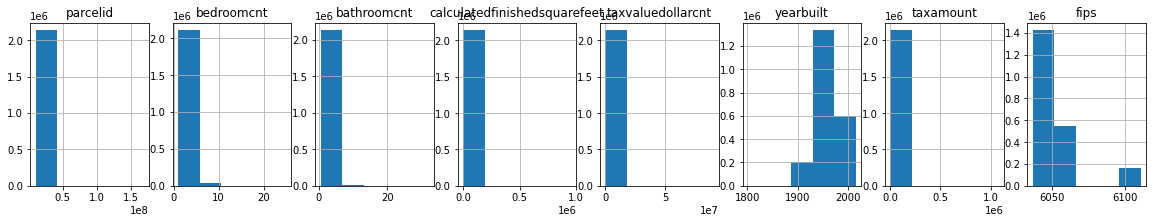

In [30]:
plt.figure(figsize=(20,3))
cols = df.columns
for i, col in enumerate(cols):
    plot_number = i+1
    plt.subplot(1, 8, plot_number)
    plt.title(col)
    df[col].hist(bins=5)

In [31]:
# df.shape[0]

In [32]:
# add zscores to get rid of outliers : 3.5 cutoff